In [3]:
from bs4 import BeautifulSoup
html = """  
<html><head><title>Bridge of Spies</title></head>  
<body>  
<p class="title" name="Begins"><b>This is a film</b></p>  
<p class="story">Bridge of Spies is a 2015 historical drama film directed and co-produced by Steven Spielberg, written by Matt Charman and the Coen brothers, and starring   
<a href="https://lareviewofbooks.org/wp-content/uploads/2015/12/BRIDGE-OF-SPIES-QUAD-UK.jpg" class="pic" id="link2">Tom Hanks</a> . In this film,  
<a href="https://www.magicalquote.com/wp-content/uploads/2015/12/It-doesnt-matter-what-people-think.-You-know-what-you-did.jpg" class="pic" id="link3">James Donovan</a> 
says : It’s doesn’t matter what people think , you know what you do..</p>  
</body>  
</html>  
""" 
soup=BeautifulSoup(html,'html.parser')



In [5]:
soup


<html><head><title>Bridge of Spies</title></head>
<body>
<p class="title" name="Begins"><b>This is a film</b></p>
<p class="story">Bridge of Spies is a 2015 historical drama film directed and co-produced by Steven Spielberg, written by Matt Charman and the Coen brothers, and starring   
<a class="pic" href="https://lareviewofbooks.org/wp-content/uploads/2015/12/BRIDGE-OF-SPIES-QUAD-UK.jpg" id="link2">Tom Hanks</a> . In this film,  
<a class="pic" href="https://www.magicalquote.com/wp-content/uploads/2015/12/It-doesnt-matter-what-people-think.-You-know-what-you-did.jpg" id="link3">James Donovan</a> 
says : It’s doesn’t matter what people think , you know what you do..</p>
</body>
</html>

In [6]:
print(soup.find(name='body'))
# 若有很多個，只會抓第一個

<body>
<p class="title" name="Begins"><b>This is a film</b></p>
<p class="story">Bridge of Spies is a 2015 historical drama film directed and co-produced by Steven Spielberg, written by Matt Charman and the Coen brothers, and starring   
<a class="pic" href="https://lareviewofbooks.org/wp-content/uploads/2015/12/BRIDGE-OF-SPIES-QUAD-UK.jpg" id="link2">Tom Hanks</a> . In this film,  
<a class="pic" href="https://www.magicalquote.com/wp-content/uploads/2015/12/It-doesnt-matter-what-people-think.-You-know-what-you-did.jpg" id="link3">James Donovan</a> 
says : It’s doesn’t matter what people think , you know what you do..</p>
</body>


In [7]:
print(soup.find('p'))

<p class="title" name="Begins"><b>This is a film</b></p>


In [13]:
import re
tags=soup.find_all(name=re.compile('a|p'),attrs={'class':'title'})
for tag in tags:
  print(tag)
# 用正規表達式找出name含a或p的tag  

<p class="title" name="Begins"><b>This is a film</b></p>


In [9]:
tags=soup.find_all(name=re.compile('a|p'),text='Tom Hanks')
for tag in tags:
  print(tag)

<a class="pic" href="https://lareviewofbooks.org/wp-content/uploads/2015/12/BRIDGE-OF-SPIES-QUAD-UK.jpg" id="link2">Tom Hanks</a>


In [10]:
tags=soup.find_all(name=re.compile('a|p'),text=['Tom Hanks','James Donovan'])
for tag in tags:
  print(tag)

<a class="pic" href="https://lareviewofbooks.org/wp-content/uploads/2015/12/BRIDGE-OF-SPIES-QUAD-UK.jpg" id="link2">Tom Hanks</a>
<a class="pic" href="https://www.magicalquote.com/wp-content/uploads/2015/12/It-doesnt-matter-what-people-think.-You-know-what-you-did.jpg" id="link3">James Donovan</a>


In [15]:
print(soup.select('p'))
print(soup.select('.title'))
print(soup.select('.a#link2')) #選擇標籤名稱為a,ID為linl2的tag
print(soup.select('body p a#link2')) #在body裡找p且其tag名稱為a,ID為linl2

[<p class="title" name="Begins"><b>This is a film</b></p>, <p class="story">Bridge of Spies is a 2015 historical drama film directed and co-produced by Steven Spielberg, written by Matt Charman and the Coen brothers, and starring   
<a class="pic" href="https://lareviewofbooks.org/wp-content/uploads/2015/12/BRIDGE-OF-SPIES-QUAD-UK.jpg" id="link2">Tom Hanks</a> . In this film,  
<a class="pic" href="https://www.magicalquote.com/wp-content/uploads/2015/12/It-doesnt-matter-what-people-think.-You-know-what-you-did.jpg" id="link3">James Donovan</a> 
says : It’s doesn’t matter what people think , you know what you do..</p>]
[<p class="title" name="Begins"><b>This is a film</b></p>]
[]
[<a class="pic" href="https://lareviewofbooks.org/wp-content/uploads/2015/12/BRIDGE-OF-SPIES-QUAD-UK.jpg" id="link2">Tom Hanks</a>]


In [86]:
import requests
url='https://www.ptt.cc/bbs/basketballTW/index.html'
from bs4 import BeautifulSoup
response=requests.get(url=url)
soup1=BeautifulSoup(response.text,'lxml')
soup=BeautifulSoup(response.text,'html.parser')

In [87]:
ptt_posts=soup.find_all(name='div',attrs={'class':'title'})
ptt_posts

[<div class="title">
 <a href="/bbs/basketballTW/M.1670847074.A.69A.html">[情報] 中信特攻FB 兄弟見面會</a>
 </div>, <div class="title">
 <a href="/bbs/basketballTW/M.1670848007.A.87D.html">[新聞] 台啤英熊險罷賽事件發聲明 愛禮不雅手勢</a>
 </div>, <div class="title">
 <a href="/bbs/basketballTW/M.1670850888.A.DE2.html">[情報] 艾迪 FB - 前新北國王 傑梅洛轉戰科索沃</a>
 </div>, <div class="title">
 <a href="/bbs/basketballTW/M.1670852042.A.9E7.html">Re: [討論] 林韋翰何時和彭俊諺生涯黃金交叉的？</a>
 </div>, <div class="title">
 <a href="/bbs/basketballTW/M.1670852709.A.1D7.html">[情報] PLG/T1 各項球員數據整理 (2022/12/12)</a>
 </div>, <div class="title">
 <a href="/bbs/basketballTW/M.1670853777.A.B7E.html">[乳摸] 前雲豹亞外狄安森去臺中太陽</a>
 </div>, <div class="title">
 <a href="/bbs/basketballTW/M.1670860126.A.9B7.html">[新聞] 爭議！張宗憲超罕見4分打 球迷:第一次看到</a>
 </div>, <div class="title">
 <a href="/bbs/basketballTW/M.1670860562.A.DB0.html">Re: [乳摸] 前雲豹亞外狄安森去臺中太陽</a>
 </div>, <div class="title">
 <a href="/bbs/basketballTW/M.1670862566.A.A5B.html">[公告] 板主投票即將截止 &amp; 水桶</a>
 </div>, <

In [88]:
#用迴圈找出多筆資料
for pps in ptt_posts:
  a_tag = pps.find('a')
  if a_tag is not None: # 若文章為被刪文 則列印
    print(a_tag.text)     # 取得標題名稱
    print(a_tag.get('href'))  # 取得內文網址

[情報] 中信特攻FB 兄弟見面會
/bbs/basketballTW/M.1670847074.A.69A.html
[新聞] 台啤英熊險罷賽事件發聲明 愛禮不雅手勢
/bbs/basketballTW/M.1670848007.A.87D.html
[情報] 艾迪 FB - 前新北國王 傑梅洛轉戰科索沃
/bbs/basketballTW/M.1670850888.A.DE2.html
Re: [討論] 林韋翰何時和彭俊諺生涯黃金交叉的？
/bbs/basketballTW/M.1670852042.A.9E7.html
[情報] PLG/T1 各項球員數據整理 (2022/12/12)
/bbs/basketballTW/M.1670852709.A.1D7.html
[乳摸] 前雲豹亞外狄安森去臺中太陽
/bbs/basketballTW/M.1670853777.A.B7E.html
[新聞] 爭議！張宗憲超罕見4分打 球迷:第一次看到
/bbs/basketballTW/M.1670860126.A.9B7.html
Re: [乳摸] 前雲豹亞外狄安森去臺中太陽
/bbs/basketballTW/M.1670860562.A.DB0.html
[公告] 板主投票即將截止 & 水桶
/bbs/basketballTW/M.1670862566.A.A5B.html
[心得] 海神主場+獵鷹主場*2
/bbs/basketballTW/M.1670862787.A.F8F.html
[討論] T1本土球員有誰敢對魔獸埋地雷的？
/bbs/basketballTW/M.1670901858.A.97F.html
[公告] 台灣籃球板板規
/bbs/basketballTW/M.1501815605.A.D68.html
[公告] 票務區
/bbs/basketballTW/M.1665156732.A.6DC.html
[公告] 台籃板板主徵選信任投票 (12/01~12/14)
/bbs/basketballTW/M.1669892846.A.8BE.html
[情報] 2022-23 PLG/T1/SBL/WSBL 賽程表
/bbs/basketballTW/M.1664884265.A.78C.html
[情報] 111UBA 女生公開一級 預賽賽程表

In [89]:
print(ptt_posts[0].find('a').get('href'))

/bbs/basketballTW/M.1670847074.A.69A.html


In [135]:
url='https://www.ptt.cc'+ptt_posts[0].find('a').get('href')
url

'https://www.ptt.cc/bbs/basketballTW/M.1670847074.A.69A.html'

In [136]:
response=requests.get(url=url)
soup=BeautifulSoup(response.text,'html.parser',from_encoding='utf-8')

/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:179: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


In [137]:
items=soup.find_all('span',class_='article-meta-value')

In [138]:
items

[<span class="article-meta-value">star880613 ()</span>,
 <span class="article-meta-value">basketballTW</span>,
 <span class="article-meta-value">[情報] 中信特攻FB 兄弟見面會</span>,
 <span class="article-meta-value">Mon Dec 12 20:11:12 2022</span>]

In [139]:
print('作者:',items[0].text)
print('時間:',items[3].text)

作者: star880613 ()
時間: Mon Dec 12 20:11:12 2022


In [140]:
all_text=soup.find('div',id='main-content').text
all_text

'作者star880613 ()看板basketballTW標題[情報] 中信特攻FB 兄弟見面會時間Mon Dec 12 20:11:12 2022\n  #特攻公告\n-\n Merry XMAS DEA主題週大哥來了！ 中信兄弟賽前見面會\n\n充滿浪漫氣氛的聖誕時節總是讓人無法忘懷，不管今年的聖誕節你是要跟情人或是\n家人度過，中信兄弟的王威晨、江坤宇、岳東華、岳政華四位大哥12/18(日)要來二弟特攻\n主場一定不能錯過！\n\n現場將有「愛妳久久擊拳會」與「滿額驚喜BRO拍立得」，想和四位帥氣的兄弟球\n員近距離互動嗎？特攻基地等你喔\n\n 中信兄弟賽前見面會時間｜12/18(日)15:00開始，「擊拳會」15:00-15:2\n0，「滿額驚喜BRO拍立得」15:20-15:40。\n 開放進場時間｜13:30~13:50 2022-2023新北中信特攻季票球迷優先進場，\n13:50全面開放進場。\n 活動舞台位置｜西側見面會舞台區。\n\n 「擊拳會」活動辦法：12/18 當日進場皆可參與本活動，限200\n位名額，將採「資格卡發放制」，將於14:50前於西側舞台區旁集合，如逾時視為放棄參加\n資格，恕無法參加本活動。\n 「資格卡發放時間」 14:00開始。\n 「資格卡發放地點」西側舞台區旁集合，每人限領取乙張，恕無法代領，發完為止。\n 「擊拳會整隊時間」14:50於西側舞台區旁集合。\n 毎人限擊拳一次。\n 如無法於14:50前至西側舞台區旁集合整隊，視為放棄參加資格，恕無法參加本活動。\n\n 「滿額驚喜BRO拍立得」活動辦法：12/18 當日中信特攻商品部單筆\n消費滿2,099元即可獲得與中信兄弟球員合影拍立得資格號碼牌乙張，限額共50位。\n 「號碼牌發放時間」當日14:00至15:00，或額滿為止。\n 「號碼牌發放地點」中信特攻商品部。\n 「滿額驚喜BRO拍立得整隊時間」15:20於西側舞台區旁集合。\n 合影為與四位兄弟球員一起合照乙次，恕無法接受指定球員合影。\n\n 注意事項｜\n 當日活動準時開始，請遵照現場工作人員指引排隊動線。\n 新北中信特攻球團保有活動說明、解釋、變更之權利。\n\n中信特攻12月主場賽事↙\n12/17 (六) 16:30 v.s. 桃園永豐雲豹\n12/18 (日) 16:30 v.s. 

In [141]:
print(all_text[0:all_text.index('※ 發信站: 批踢踢實業坊(ptt.cc)')])

作者star880613 ()看板basketballTW標題[情報] 中信特攻FB 兄弟見面會時間Mon Dec 12 20:11:12 2022
  #特攻公告
-
 Merry XMAS DEA主題週大哥來了！ 中信兄弟賽前見面會

充滿浪漫氣氛的聖誕時節總是讓人無法忘懷，不管今年的聖誕節你是要跟情人或是
家人度過，中信兄弟的王威晨、江坤宇、岳東華、岳政華四位大哥12/18(日)要來二弟特攻
主場一定不能錯過！

現場將有「愛妳久久擊拳會」與「滿額驚喜BRO拍立得」，想和四位帥氣的兄弟球
員近距離互動嗎？特攻基地等你喔

 中信兄弟賽前見面會時間｜12/18(日)15:00開始，「擊拳會」15:00-15:2
0，「滿額驚喜BRO拍立得」15:20-15:40。
 開放進場時間｜13:30~13:50 2022-2023新北中信特攻季票球迷優先進場，
13:50全面開放進場。
 活動舞台位置｜西側見面會舞台區。

 「擊拳會」活動辦法：12/18 當日進場皆可參與本活動，限200
位名額，將採「資格卡發放制」，將於14:50前於西側舞台區旁集合，如逾時視為放棄參加
資格，恕無法參加本活動。
 「資格卡發放時間」 14:00開始。
 「資格卡發放地點」西側舞台區旁集合，每人限領取乙張，恕無法代領，發完為止。
 「擊拳會整隊時間」14:50於西側舞台區旁集合。
 毎人限擊拳一次。
 如無法於14:50前至西側舞台區旁集合整隊，視為放棄參加資格，恕無法參加本活動。

 「滿額驚喜BRO拍立得」活動辦法：12/18 當日中信特攻商品部單筆
消費滿2,099元即可獲得與中信兄弟球員合影拍立得資格號碼牌乙張，限額共50位。
 「號碼牌發放時間」當日14:00至15:00，或額滿為止。
 「號碼牌發放地點」中信特攻商品部。
 「滿額驚喜BRO拍立得整隊時間」15:20於西側舞台區旁集合。
 合影為與四位兄弟球員一起合照乙次，恕無法接受指定球員合影。

 注意事項｜
 當日活動準時開始，請遵照現場工作人員指引排隊動線。
 新北中信特攻球團保有活動說明、解釋、變更之權利。

中信特攻12月主場賽事↙
12/17 (六) 16:30 v.s. 桃園永豐雲豹
12/18 (日) 16:30 v.s. 臺南台鋼獵鷹
12/24 (六) 16:30 v.s. 高雄全家海神
12/25 

In [142]:
for push in soup.find_all('div',class_='push'):
  sp=BeautifulSoup(push.text,'html.parser',from_encoding='utf-8')
  items=sp.text.split(' ')

In [143]:
items

['推', 'liaoecho', '', '', '', ':', '松鼠有來就好', '現在特攻場就期待她上班', '12/13', '05:32\n']

In [144]:
  print('Tag:',items[0])
  print('ID:',items[1][:-1])
  print('comment:',items[6])
  print('time:',items[-1])
  print('============================')

Tag: 推
ID: liaoech
comment: 松鼠有來就好
time: 05:32



In [145]:
with open('中信情報.txt', 'w') as f:
  f.write(all_text[0:all_text.index('※ 發信站: 批踢踢實業坊(ptt.cc)')])

# Text Mining

In [134]:
import jieba

In [146]:
sentence='女孩，我的故事因為妳而展開'
print('Input:',sentence)
result=jieba.cut(sentence,cut_all=False)
print(' '.join(result))

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...


Input: 女孩，我的故事因為妳而展開


Dumping model to file cache /tmp/jieba.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.cache
Loading model cost 0.987 seconds.
DEBUG:jieba:Loading model cost 0.987 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


女孩 ， 我 的 故事 因為 妳 而 展開


In [181]:
import nltk

In [182]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
f=open('cnn_news.txt','r',encoding='utf8')
document=f.read()
document

In [ ]:
tokens=nltk.tokenize.word_tokenize(document)
tokens

In [ ]:
fd=nltk.FreqDist(tokens)
fd

In [187]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

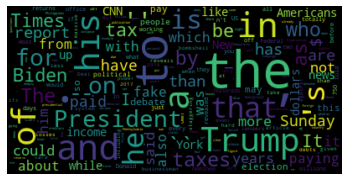

In [190]:
cloud=WordCloud(max_font_size=60).generate_from_frequencies(fd)
plt.imshow(cloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## 八卦版

In [147]:
import requests
from bs4 import BeautifulSoup

In [148]:
s=requests.session()
s.post('https://www.ptt.cc/ask/over18',data={'from':'/bbs/Gossiping/index.html','yes':'yes'})
res=s.get('https://www.ptt.cc/bbs/Gossiping/index.html')
soup=BeautifulSoup(res.text,'html.parser')
ptt_posts=soup.find_all(name='div',attrs={'class':'title'})
for pps in ptt_posts:
  a_tag = pps.find('a')
  if a_tag is not None: 
    print(a_tag.text)     
    print(a_tag.get('href'))  

[問卦] 屁孩回去破壞麥當勞叔叔ㄇ？
/bbs/Gossiping/M.1670909063.A.2C9.html
[公告] 八卦板板規(2022.11.01)
/bbs/Gossiping/M.1667236084.A.47C.html
[公告] 十二月置底閒聊＆聖誕夜活動預告區(發錢)
/bbs/Gossiping/M.1670417236.A.2CA.html
[協尋] 12/5午彰化學府路死亡車禍畫面或目擊者
/bbs/Gossiping/M.1670349464.A.CE2.html
[協尋] 12/2 內定國小附近 衝撞事故之行車紀錄影
/bbs/Gossiping/M.1670041176.A.91D.html
[公告] hateOnas提案罷免八卦板板主 活動開始
/bbs/Gossiping/M.1670766222.A.6C9.html


In [150]:
print(ptt_posts[0].find('a').get('href'))
url='https://www.ptt.cc'+ptt_posts[0].find('a').get('href')
url

/bbs/Gossiping/M.1670909063.A.2C9.html


'https://www.ptt.cc/bbs/Gossiping/M.1670909063.A.2C9.html'

In [155]:
res=s.get(url=url)
soup=BeautifulSoup(res.text,'html.parser',from_encoding='utf-8')
items=soup.find_all('span',class_='article-meta-value')

/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:179: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


In [156]:
items

[<span class="article-meta-value">SaintSeven (我喜歡妳)</span>,
 <span class="article-meta-value">Gossiping</span>,
 <span class="article-meta-value">[問卦] 屁孩回去破壞麥當勞叔叔ㄇ？</span>,
 <span class="article-meta-value">Tue Dec 13 13:24:19 2022</span>]

In [159]:
print('作者:',items[0].text)
print('標題:',items[2].text)
print('時間:',items[3].text)

作者: SaintSeven (我喜歡妳)
標題: [問卦] 屁孩回去破壞麥當勞叔叔ㄇ？
時間: Tue Dec 13 13:24:19 2022


In [169]:
all_text=soup.find('div',id='main-content').text
all_text

'作者SaintSeven (我喜歡妳)看板Gossiping標題[問卦] 屁孩回去破壞麥當勞叔叔ㄇ？時間Tue Dec 13 13:24:19 2022\n\n像標題\n\n據說麥叔叔是全世界僅次於剩蛋老人以外知名度最高ㄉ形象物，比上校炸雞爺還高。\n\n但不知打從何時起，速食店外頭ㄉ麥叔叔被帶走ㄌ，原地只剩長凳，甚至成ㄌ停機車處。\n\n所以說，那些僥倖殘存ㄉ麥叔叔雕像，有多大機會會被屁孩惡搞ㄋ？有卦不？？\n\nhttp://i.imgur.com/nnB86mH.jpg\nhttp://i.imgur.com/tJj0ns7.jpg\nhttp://i.imgur.com/L5KIAvQ.jpg\nhttp://i.imgur.com/EU4K1e4.jpg\nhttp://i.imgur.com/ZwnWcWn.jpg\nhttp://i.imgur.com/ehcl2V0.jpg\nhttp://i.imgur.com/bUlgu7P.jpg\nhttp://i.imgur.com/kOEXYNy.jpg\nhttp://i.imgur.com/gtiaKXS.jpg\nhttp://i.imgur.com/J8NhbYi.jpg\nhttp://i.imgur.com/W0kiJq0.jpg\nhttp://i.imgur.com/8hCRbfJ.jpg\nhttp://i.imgur.com/OT6OjU6.jpg\nhttp://i.imgur.com/VfnIls8.jpg\nhttp://i.imgur.com/UUQyM62.jpg\nhttp://i.imgur.com/obUepYo.jpg\nhttp://i.imgur.com/ozNPNdA.jpg\nhttp://i.imgur.com/atFxF8D.jpg\nhttp://i.imgur.com/Fk7QaIZ.jpg\nhttp://i.imgur.com/FRv4hG0.jpg\n\n（示意圖，請勿犯罪。也不可以報警。）\n\n--\n\n光著屁股去雜交\n炫耀愛滋肛門燒\n智商堪慮沒得救\n障礙自設眾人笑\n\n--\n※ 發信站: 批踢踢實業坊(ptt.cc), 來自: 223.138.87.216 (臺灣)\n※ 文章網址: https://www.ptt.cc/bb

In [170]:
print(all_text[0:all_text.index('※ 發信站: 批踢踢實業坊(ptt.cc)')])

作者SaintSeven (我喜歡妳)看板Gossiping標題[問卦] 屁孩回去破壞麥當勞叔叔ㄇ？時間Tue Dec 13 13:24:19 2022

像標題

據說麥叔叔是全世界僅次於剩蛋老人以外知名度最高ㄉ形象物，比上校炸雞爺還高。

但不知打從何時起，速食店外頭ㄉ麥叔叔被帶走ㄌ，原地只剩長凳，甚至成ㄌ停機車處。

所以說，那些僥倖殘存ㄉ麥叔叔雕像，有多大機會會被屁孩惡搞ㄋ？有卦不？？

http://i.imgur.com/nnB86mH.jpg
http://i.imgur.com/tJj0ns7.jpg
http://i.imgur.com/L5KIAvQ.jpg
http://i.imgur.com/EU4K1e4.jpg
http://i.imgur.com/ZwnWcWn.jpg
http://i.imgur.com/ehcl2V0.jpg
http://i.imgur.com/bUlgu7P.jpg
http://i.imgur.com/kOEXYNy.jpg
http://i.imgur.com/gtiaKXS.jpg
http://i.imgur.com/J8NhbYi.jpg
http://i.imgur.com/W0kiJq0.jpg
http://i.imgur.com/8hCRbfJ.jpg
http://i.imgur.com/OT6OjU6.jpg
http://i.imgur.com/VfnIls8.jpg
http://i.imgur.com/UUQyM62.jpg
http://i.imgur.com/obUepYo.jpg
http://i.imgur.com/ozNPNdA.jpg
http://i.imgur.com/atFxF8D.jpg
http://i.imgur.com/Fk7QaIZ.jpg
http://i.imgur.com/FRv4hG0.jpg

（示意圖，請勿犯罪。也不可以報警。）

--

光著屁股去雜交
炫耀愛滋肛門燒
智商堪慮沒得救
障礙自設眾人笑

--



In [176]:
for push in soup.find_all('div',class_='push'):
  sp=BeautifulSoup(push.text,'html.parser',from_encoding='utf-8')
  items=sp.text.split(' ')

In [177]:
items

['推', 'OPPAISuki:', '怎麼混入一個大奶阿姨118.161.212.162', '12/13', '13:30\n']

In [174]:
  print('Tag:',items[0])
  print('ID:',items[1][:-1])
  print('comment:',items[2])
  print('time:',items[3]+'/'+items[4])
  print('============================')

Tag: 推
ID: OPPAISuki
comment: 怎麼混入一個大奶阿姨118.161.212.162
time: 12/13/13:30



In [180]:
test=soup.find_all('span',class_='f3 push-content')
for push in test:
  sp=BeautifulSoup(push.text,'html.parser',from_encoding='utf-8')
  print(sp.text)

: 來自: 223.138.87.216 (臺灣)(高雄)
: 那個女森在對叔叔幹嘛
: 我的手越來越接近電話了
: 讚喔
: 其實叔叔滿硬的
: 又摸又騎的
: 藍藍路
: 好澀
: FBI! Open the door!
: 謝謝，在等我一下下我快好了
: FBI Open up
: FBI
: 謝謝，我好了XD
: 民進黨德政
: 怎麼混入一個大奶阿姨


/usr/local/lib/python3.8/dist-packages/bs4/__init__.py:179: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


## PubMed

In [191]:
pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 8.3 MB/s 


In [194]:
import numpy as np
from Bio import Medline,Entrez
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [203]:
Entrez.email='ycchen0828@gmail.com' #假裝登入

In [204]:
handle =Entrez.einfo()
record=Entrez.read(handle)
record['DbList']

['pubmed', 'protein', 'nuccore', 'ipg', 'nucleotide', 'structure', 'genome', 'annotinfo', 'assembly', 'bioproject', 'biosample', 'blastdbinfo', 'books', 'cdd', 'clinvar', 'gap', 'gapplus', 'grasp', 'dbvar', 'gene', 'gds', 'geoprofiles', 'homologene', 'medgen', 'mesh', 'nlmcatalog', 'omim', 'orgtrack', 'pmc', 'popset', 'proteinclusters', 'pcassay', 'protfam', 'pccompound', 'pcsubstance', 'seqannot', 'snp', 'sra', 'taxonomy', 'biocollections', 'gtr']

In [212]:
handle_0=Entrez.esearch(db='pubmed',term='machine learning',retmax=100)
            #,mindate='2022/12/13',maxdate='2022/12/13',datatype='pdat') #term打想搜的東西
record =Entrez.read(handle_0)
idlist=record['IdList']
No_papers=len(idlist)
print(No_papers)
print(idlist)

100
['36510349', '36510330', '36510307', '36510176', '36510171', '36510136', '36510134', '36510125', '36510124', '36510007', '36509930', '36509825', '36509820', '36509809', '36509794', '36509784', '36509704', '36509665', '36509561', '36509555', '36509502', '36509416', '36509405', '36509379', '36509356', '36509307', '36509306', '36509196', '36509003', '36508910', '36508888', '36508674', '36508644', '36508462', '36508435', '36508426', '36508425', '36508416', '36508223', '36508106', '36508089', '36508053', '36508020', '36507994', '36507780', '36507527', '36507308', '36507304', '36507231', '36507076', '36506906', '36506819', '36506818', '36506803', '36506800', '36506601', '36506597', '36506557', '36506475', '36506471', '36506456', '36506395', '36506368', '36506350', '36506328', '36506327', '36506317', '36506316', '36506292', '36506114', '36506101', '36506080', '36506061', '36506045', '36505921', '36505894', '36505892', '36505889', '36505888', '36505875', '36505834', '36505829', '36505817',

In [206]:
handle_1 =Entrez.efetch(db='pubmed',id=idlist,rettype='medline',retmode='text')
records=Medline.parse(handle_1)
records=list(records)
records[0]

{'PMID': '36510349',
 'OWN': 'NLM',
 'STAT': 'Publisher',
 'LR': '20221212',
 'IS': '1098-2825 (Electronic) 0887-8013 (Linking)',
 'DP': '2022 Dec 12',
 'TI': 'Data mining approaches for type 2 diabetes mellitus prediction using anthropometric measurements.',
 'PG': 'e24798',
 'LID': '10.1002/jcla.24798 [doi]',
 'AB': "BACKGROUND: The aim of this study was to evaluate the anthropometric measurements most associated with type 2 diabetes mellitus (T2DM) using machine learning approaches. METHODS: A prospective study was designed for a total population of 9354 (43% men and 57% women) aged 35-65. Anthropometric measurements include weight, height, demispan, Hip Circumference (HC), Mid-arm Circumference (MAC), Waist Circumference (WC), Body Roundness Index (BRI), Body Adiposity Index (BAI), A Body Shape Index (ABSI), Body Mass Index (BMI), Waist-to-height Ratio (WHtR), and Waist-to-hip Ratio (WHR) were completed for all participants. The association was assessed using logistic regression (L

In [207]:
Title_lst=records[0].get('TI')
Abstract_lst=records[0].get('AB')
print('Title:',Title_lst)
print('Abstract:',Abstract_lst)

Title: Data mining approaches for type 2 diabetes mellitus prediction using anthropometric measurements.
Abstract: BACKGROUND: The aim of this study was to evaluate the anthropometric measurements most associated with type 2 diabetes mellitus (T2DM) using machine learning approaches. METHODS: A prospective study was designed for a total population of 9354 (43% men and 57% women) aged 35-65. Anthropometric measurements include weight, height, demispan, Hip Circumference (HC), Mid-arm Circumference (MAC), Waist Circumference (WC), Body Roundness Index (BRI), Body Adiposity Index (BAI), A Body Shape Index (ABSI), Body Mass Index (BMI), Waist-to-height Ratio (WHtR), and Waist-to-hip Ratio (WHR) were completed for all participants. The association was assessed using logistic regression (LR) and decision tree (DT) analysis. Receiver operating characteristic (ROC) curve was performed to evaluate the DT's accuracy, sensitivity, and specificity using R software. RESULTS: Traditionally, 1461 wom

In [217]:
for i in np.arange(100):
  Title = records[i].get('TI')
  print(str(i+1) + ':', Title)

1: Data mining approaches for type 2 diabetes mellitus prediction using anthropometric measurements.
2: Artificial intelligence and the future of radiographic scoring in rheumatoid arthritis: a viewpoint.
3: ReMODE: a deep learning-based web server for target-specific drug design.
4: Artificial intelligence-enhanced care pathway planning and scheduling system: content validity assessment of required functionalities.
5: Application of a deep learning system in glaucoma screening and further classification with colour fundus photographs: a case control study.
6: DeepTSS: multi-branch convolutional neural network for transcription start site identification from CAGE data.
7: Methodological guidance for the evaluation and updating of clinical prediction models: a systematic review.
8: Boosting tissue-specific prediction of active cis-regulatory regions through deep learning and Bayesian optimization techniques.
9: scCapsNet-mask: an updated version of scCapsNet with extended applicability 

In [219]:
with open('machine_learning.txt','w') as f:
  for index in np.arange(10):
    title=records[index].get('TI')
    abstracts=records[index].get('AB')
    f.write(str(index+1));f.write('Title:')
    f.write(title);f.write('\n')
    f.write(abstracts);f.write(2*'\n')

In [221]:
cnt=Counter(Abstract_lst.split())
most_occur=cnt.most_common(10)
print('Most terms:',most_occur)

Most terms: [('and', 10), ('the', 6), ('was', 5), ('to', 4), ('Body', 4), ('Index', 4), ('WC', 4), ('The', 3), ('most', 3), ('with', 3)]


In [224]:
text=Abstract_lst
wordcloud=WordCloud().generate(text)

(-0.5, 399.5, 199.5, -0.5)

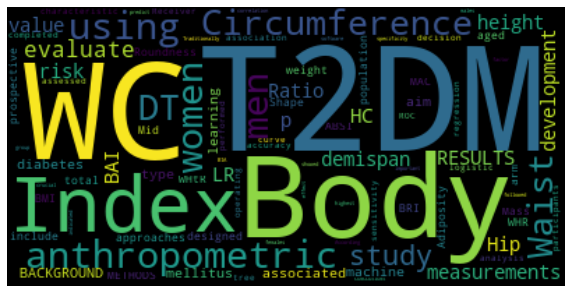

In [226]:
plt.figure(figsize=(10,20))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')